In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


In [2]:
import shap
import joblib

pipeline = joblib.load("../models/full_pipeline.pkl")

c:\Users\nithi\Clinical-AI-System\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("../data/processed/ckd_processed.csv")

X = df.drop(columns=["Class"])
y = df["Class"]


In [4]:
X_sample = X.sample(100, random_state=42)
preprocessor = pipeline.named_steps["preprocessor"]
model = pipeline.named_steps["model"]


In [5]:
X_transformed = preprocessor.transform(X)


In [8]:
explainer = shap.Explainer(model, X_transformed, feature_names=feature_names)
shap_values = explainer(X_transformed)


In [7]:
feature_names = preprocessor.get_feature_names_out()


In [9]:
shap_values.shape
X_transformed

array([[-0.00249751,  0.23444174, -0.44570798, ...,  1.        ,
         0.        ,  1.        ],
       [ 2.39511356, -1.92134438, -0.82026344, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.79670618,  0.23444174, -0.09196117, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.8017012 ,  0.23444174, -0.65379435, ...,  0.        ,
         0.        ,  1.        ],
       [-0.8017012 , -1.20274901, -0.15438708, ...,  0.        ,
         0.        ,  1.        ],
       [-0.8017012 ,  0.23444174, -0.82026344, ...,  0.        ,
         0.        ,  1.        ]], shape=(400, 14))

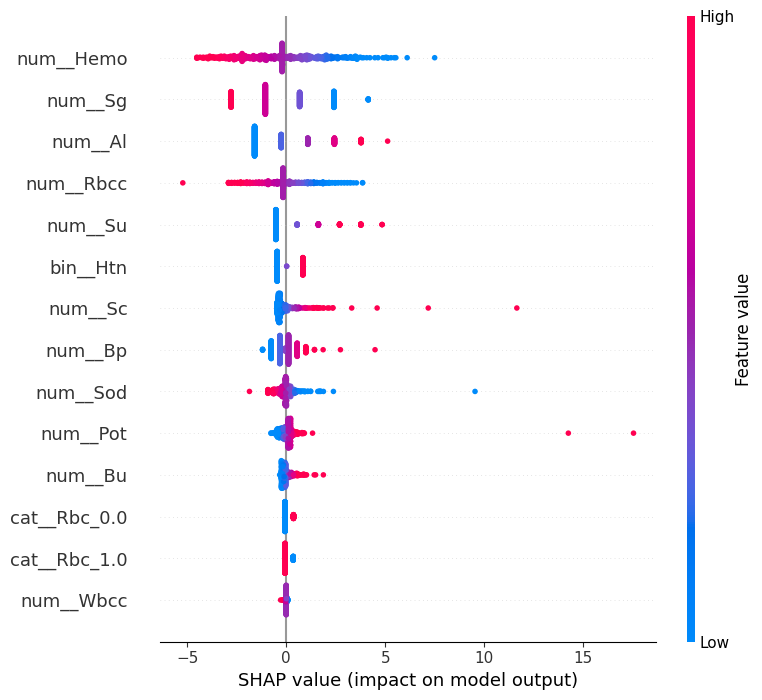

In [10]:
shap.summary_plot(
    shap_values,
    X_transformed,
    feature_names=feature_names
)


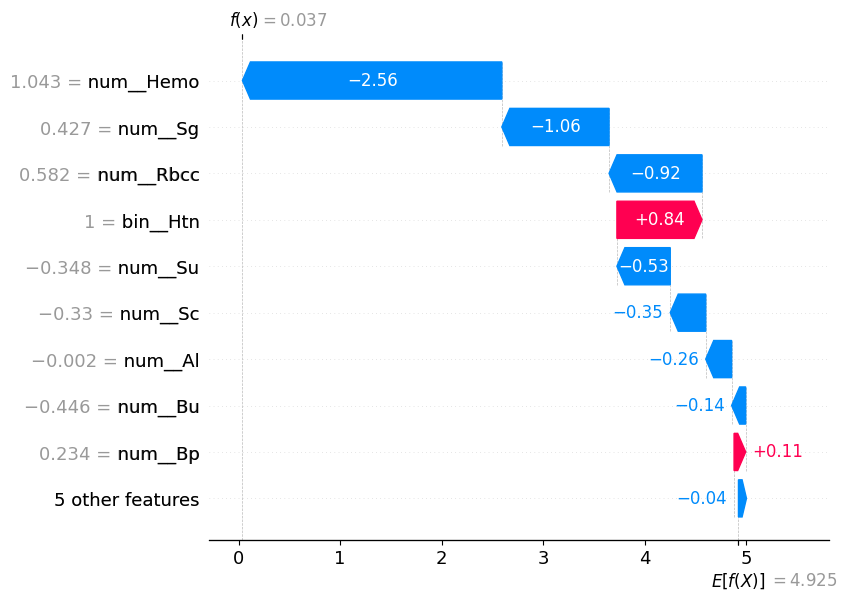

In [11]:
shap.plots.waterfall(shap_values[0])


In [12]:
# Get feature names from preprocessing pipeline
preprocessor = pipeline.named_steps["preprocessor"]

feature_names = preprocessor.get_feature_names_out()


In [13]:
sample_idx = 0  # same sample used in waterfall

shap_vals = shap_values[sample_idx].values

shap_dict = dict(zip(feature_names, shap_vals))

top_shap_features = dict(
    sorted(
        shap_dict.items(),
        key=lambda x: abs(x[1]),
        reverse=True
    )[:5]
)

top_shap_features


{'num__Hemo': np.float64(-2.556378019440033),
 'num__Sg': np.float64(-1.0566195219201384),
 'num__Rbcc': np.float64(-0.9160225213897829),
 'bin__Htn': np.float64(0.8386874161218711),
 'num__Su': np.float64(-0.5257486235659722)}

In [14]:
# Get predicted probability for the same sample
y_pred_proba = pipeline.predict_proba(X)[sample_idx, 1]


In [27]:
import os, json

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
ARTIFACT_DIR = os.path.join(BASE_DIR, "genai", "data", "artifacts")

os.makedirs(ARTIFACT_DIR, exist_ok=True)

output_path = os.path.join(ARTIFACT_DIR, "shap_output.json")

with open(output_path, "w") as f:
    json.dump(shap_export, f, indent=2)

print("Saved to:", output_path)


Saved to: c:\Users\nithi\Clinical-AI-System\genai\data\artifacts\shap_output.json


In [ ]:
#For binary classification, SHAP directly returns feature attributions for the positive class, eliminating the need for class-wise indexing.
#Feature names were passed at explainer initialization to ensure compatibility with SHAP’s plotting API.
